# Science Case 4a

The phase and bandpass calibrators are included in the product tree of the pipeline results, but they cannot be found in the online query. We developed a shortcut of putting calibrators in another database, which could be queried much like the science queries, except there is only continuum available.

Stacking of calibrator maps has already resulted of interested results (Zwaan, priv.comm.)

The use of this notebook is not scientific, as we have no control over how the flux scale was determined (usually via a planet or a moon of a planet). With that caveat we are going to plot the flux as function of time for the calibrators we have available.

(reminder) In another notebook, we should check the flux of the continuum source in NGC3504, as we have several measurements in different projects.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
from astroquery.admit import ADMIT
import pandas as pd
a = ADMIT('../admit_cal.db')
a.check()

Found  ../admit_cal.db
Checking db.... 0
header    : 99 entries
alma      : 99 entries
win       : 99 entries
lines     : 0 entries
sources   : 99 entries


First we need to find the unique names of the sources. This is probably easiest done with a special **SELECT DISTINCT** query in sql.    We find 15 sources.

In [3]:
p=pd.DataFrame(a.sql('select distinct alma.target_name from alma'))
print(p)

             0
0   J1002+1216
1   J1118+1234
2   J1215+1654
3   J1221+2813
4   J1336-3357
5   J1130+0846
6   J1103+3014
7   J1150+2417
8   J1159+2914
9   J1058+0133
10  J0854+2006
11  J1037-2934
12  J1337-1257
13  J1229+0203
14  J1427-4206


Let's just pick a random one, and review the fluxes, and plot fluxes as function of time (ALMA keeps the MJD in the database. There are functions to change these back to a human readable time, but we leave this is as an exercize for the reader!

In [4]:
source = "J1058+0133"
t1 = a.query(source_name_alma=source)

kwargs  {'source_name_alma': 'J1058+0133'}
select * from alma inner join win on (win.a_id = alma.id) inner join sources on (sources.w_id = win.id)   WHERE alma.target_name='J1058+0133' AND sources.l_id = 0 


In [5]:
ci=['t_min', 'flux', 'peak_s']
print(t1[ci])

           t_min  flux  peak_s
0   58067.381452  2.80    2.26
1   58067.381452  2.72    2.15
2   58067.381452  2.70    2.13
3   58067.381452  2.78    2.24
4   58055.534294  2.89    2.47
5   58055.534294  2.80    2.36
6   58055.534294  2.79    2.34
7   58055.534294  2.88    2.46
8   58083.495681  2.88    2.50
9   58083.495681  2.79    2.40
10  58083.495681  2.78    2.40
11  58083.495681  2.87    2.49
12  57713.447599  3.70    3.42
13  57713.447599  3.82    3.56
14  57713.447599  3.81    3.55
15  57713.447599  3.72    3.16
16  57830.124871  3.42    3.42
17  57830.124871  3.53    3.52
18  57830.124871  3.52    3.52
19  57830.124871  3.43    3.18
20  57709.478662  3.68    3.36
21  57709.478662  3.68    3.36
22  57709.478662  3.57    3.22
23  57709.478662  3.56    3.40


Text(0, 0.5, 'Flux (Jy)')

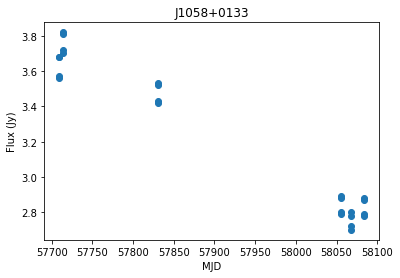

In [6]:
plt.scatter(t1['t_min'],t1['flux']);
plt.title(source)
plt.xlabel('MJD')
plt.ylabel('Flux (Jy)')

Clearly over the course of 400 days the flux has decreased by some 20%. 

Since we have both peak and flux, we could check how well it is a point source. There are other ways to do this too, plus we don't know how well CASA's **findsources** worked, but it could give us a hint the code needs to be improved.

In [7]:
fop = t1['flux']/t1['peak_s']

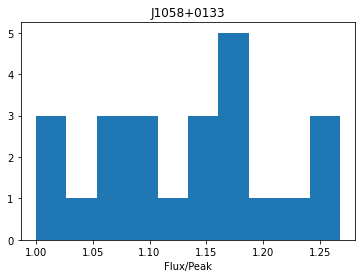

In [8]:
plt.hist(fop)
plt.xlabel('Flux/Peak')
plt.title(source);